In [138]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

*Загружаем изображение*

In [139]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

*Устанавляиваем гранци*

In [140]:
edges = cv2.Canny(image_gray, 100, 150, apertureSize = 3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)

*Вычисляем наиболее протяжённый участок дороги*

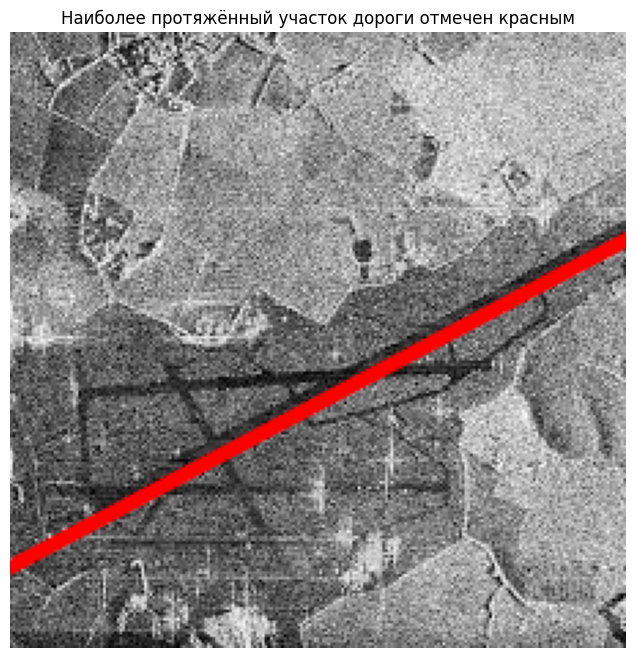

In [141]:
lineImage = image.copy()
max_length = 0
longest_line = None

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho

        # Ограничиваем координаты рамками изображения
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))

        # Вычисляем длину линии
        length = np.sqrt((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2)
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

        # Рисуем все линии тонкой красной линией
        cv2.line(lineImage, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)

# Рисуем самую длинную линию зелёной
if longest_line is not None:
    updatedImage = image.copy()
    cv2.line(updatedImage, longest_line[0], longest_line[1], (0, 0, 255), 3, cv2.LINE_AA)

# Показываем результат
plt.figure(figsize = (10,8))
plt.imshow(cv2.cvtColor(updatedImage, cv2.COLOR_BGR2RGB))
plt.title("Наиболее протяжённый участок дороги отмечен красным")
plt.axis('off')
plt.show()

*Используя алгоритмы бинаризации, находим участки дорог*

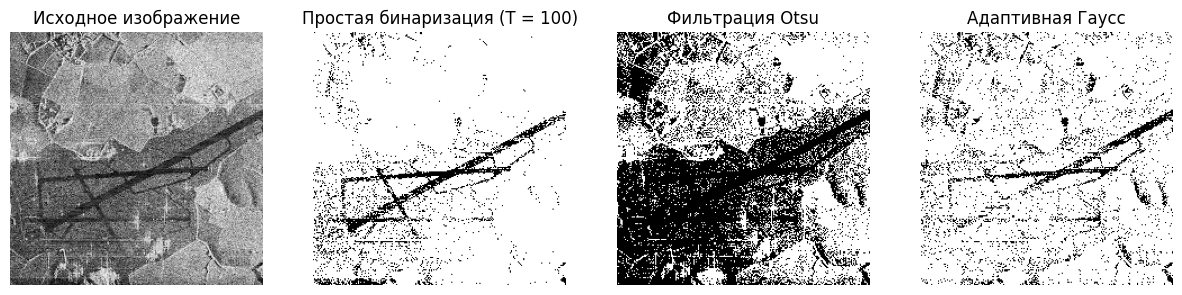

In [142]:
T = 100
_, simple_thresh = cv2.threshold(image_gray, 60, 255, cv2.THRESH_BINARY)
_, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive_gauss = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 45)

plt.figure(figsize = (15,10))

plt.subplot(2, 4, 1)
plt.imshow(image_gray, cmap = 'gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(simple_thresh, cmap = 'gray')
plt.title(f"Простая бинаризация (T = {T})")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(otsu_thresh, cmap = 'gray')
plt.title("Фильтрация Otsu")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(adaptive_gauss, cmap = 'gray')
plt.title("Адаптивная Гаусс")
plt.axis('off')

plt.show()

*Выделяем участки дорог красным цветом*

In [143]:
m_GBlur = cv2.GaussianBlur(adaptive_gauss, (7, 7), 0)
edges = cv2.Canny(m_GBlur, 50, 150, apertureSize = 3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold = 80, minLineLength = 30, maxLineGap = 10)

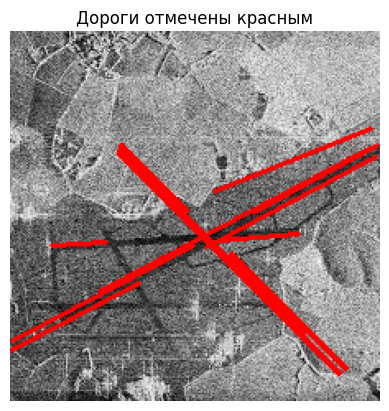

In [144]:
updatedImage = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(updatedImage, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(updatedImage, cv2.COLOR_BGR2RGB))
plt.title('Дороги отмечены красным')
plt.axis('off')

plt.show()